# Dirichlet Process

###  <div align=center> Moon Il-chul(icmoon@kaist.ac.kr);<br />Kim Young-chae(jeanne100420@kaist.ac.kr); Na Byeong-hu(wp03052@kaist.ac.kr) </div>

 본 코드에 앞서 Drichlet Process에 대해 살펴봅니다. Dirichlet process는 stochastic process 중 하나로, clustering 기법 적용시 cluster 개수인 k를 추정할 때 사용되는 과정입니다. 먼저 Drichlet process는 다음과 같이 정의할 수 있습니다.

$$G|\alpha,H \sim DP(\alpha,H)$$

$$(G(A_1),...,G(A_r)|\alpha, H \sim Dir( \alpha H(A_1),..., \alpha H(A_r))$$
        $$      A_i\cap A_j = \varnothing ~ \text{for all}~ i \neq j,\quad A_1 \cup ...\cup A_r = U      $$
        

 위 식에서 $H$의 목적은 mutually exclusive하게 분류된 $A_i(i=1...r)$을 확률분포의 형태로 변환시켜주는 데 있습니다. Dirichlet process가 가지는 평균과 분산은 다음과 같습니다.
 
 $$E[G(A)] = H(A),\qquad \upsilon|G(A)| =\frac{H(A)(1-H(A))}{\alpha+1}$$
                                        $$  \text{H: Base distribution}$$
 $$\alpha\text{ : Concentration parameter, strength parameter (strength of prior)}$$
 
 위에서 설명한 Dirichlet process에 대한 정의를 바탕으로 n개의 data가 반영된 dirichlet process의 Posterior distribution을 정의할 수 있습니다. 우선 Dirichlet process의 G는 Multinomial distribution의 각 parameter에 대한 값을 확률로서 분배하는 역할을 하기 때문에 Prior의 역할을 합니다.즉, 이러한 Prior distribution에 Data를 통해 정의된 Likelihood가 반영되어 Posterior distribution이 완성됩니다. 이를 식으로 표현하면 아래와 같습니다.
 
 $$ (G(A_1),...,G(A_r))| \theta_1,...,\theta_n,\alpha,H) \sim Dir(\alpha H(A_1)+n_1,...,\alpha H(A_r)+n_r) $$
 $$ n_k=|(\theta_i|\theta_i \in A_k, 1\leq i \leq n)|$$
 
 위 식을 DP의 형태로 나타내면 다음과 같습니다.
 
 $$G|\theta_1,..,\theta_n,\alpha,H \sim DP(\alpha+n,\frac{\alpha}{\alpha+n}H+\frac{n}{\alpha+n}  \frac{\sum_{i=1}^N \delta_{\theta_i}}{n})$$
 
 이로부터 Dirichlet process는 각각의 parameter를 update하는 방식으로 새로운 data를 반영했다는 것을 알 수 있습니다.
 
 위에서 정의된 dirichlet process를 바탕으로 sampling하는 방식에는 크게 다음과 같이 세가지를 들 수 있습니다.
 
 $$\text{Stick Breaking scheme}$$
 $$\text{Polya Urn scheme}$$
 $$\text{Chinese Restaurant Process scheme}$$
 
 여기서는 Chiese Resataurant Process scheme에 대해 더 다뤄보겠습니다.

## Chinese restaurant
Chinese restaurant scheme의 주 목적은 각각의 data-instance에 대한 sampling입니다.
이 scheme에서 각 데이터 instance에 대한 값 $\theta$에 대한 기댓값 식을 나타내면 다음과 같습니다. 

$$E[\theta_n|\theta_1,...,\theta_{n-1},\alpha,H] \sim DP(\alpha+n-1, \frac{\alpha}{\alpha+n-1}H+\frac{n-1}{\alpha+n-1}\frac{\sum_{k=1}^K N_k\delta_{\theta_k}}{n-1})$$

$\alpha$의 경우 각각의 Cluster를 얼마나 크게 하며 weight를 어느정도 줄 지 결정하는 parameter이며 $N_k$의 경우 k번째 cluster에 assign을 받은 data instance의 개수를 의미합니다. 
 그리고 n번째 data instance가 어떠한 cluster를 형성할 지를 결정하는 확률을 식으로 나타내면 다음과 같습니다.

 $$P(\theta_n|\theta_1,...,\theta_{n-1},\alpha)= \begin{cases}\frac{N_k}{\alpha+n-1} \\
\frac{\alpha}{\alpha+n-1} \end{cases}$$

 n번째 data instance가 어떠한 cluster를 형성할 지를 결정하는 식입니다. 가령 이 instance가 k번째 cluster에 assign될 확률은 $\frac{N_k}{\alpha+n-1}$이며, 새로운 cluster를 만들어낼 확률은 $\frac{\alpha}{\alpha+n-1}$입니다.
 
## Drichlet Process Mixture Modeling Sampling Process
 본 코드는 Dirchlet Process를 이용한 sampling방법의 구현 예시 입니다. N개 observation을 sampling할 때 k번째 cluster에 assign될 posterior probability를 계산하여 sampling하는 상황을 살펴봅니다. 
 DPMM에서는 Component parameter를 Online update하는 방식으로 모델을 학습시킵니다. 위 Chinese restaurant scheme을 예시로 들면, Gaussian mixture model에 대해 각각의 cluster (table)이 가지는 parameter를 $\mu_i$와 $\Sigma_i$라 할 수 있습니다. 그리고 특정화되지 않은 F function을 gaussian형태로 설정할 수 있습니다.
 
 $$F(x_i | \theta'_i)=N(x_i|\mu_{\theta'_i},\Sigma)$$

 결국 각각의 $\mu$와 $\Sigma$에 각 $\theta$의 table assignment에 대한 정보가 포함되어 있음을 알 수 있습니다. 이를 통해 각각의 cluster (table)에 대한 parameter의 계산은 해당 cluster (table)에 assign된 data point를 통해 수행할 수 있으며 이를 통해 update도 가능합니다.

In [1]:
'''
@ copyright: AAI lab (http://aailab.kaist.ac.kr/xe2/page_GBex27)
@ author: Moon Il-chul: icmoon@kaist.ac.kr
@ annotated by Kim Young-chae: jeanne100420@kaist.ac.kr; Na Byeong-hu: wp03052@kaist.ac.kr
'''

import sys
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
from numpy import linalg as la

In [2]:
def plotPoints(data,affilitation,means,covs,delta=0.1,numLine=3):
    plt.figure()

    types = []
    for i in range(len(affilitation)):
        if affilitation[i] in types:
            pass
        else:
            types.append(affilitation[i])

    colors = [ 'r', 'g', 'b', 'y', 'k', 'coral', 'magenta','pink', 'darkcyan','gold']
    totalX = []
    totalY = []
    for j in range(len(types)):
        x = []
        y = []
        for i in range(len(data)):
            if affilitation[i] == types[j]:
                x.append(data[i][0])
                y.append(data[i][1])
                totalX.append(data[i][0])
                totalY.append(data[i][1])
        plt.plot(x,y,color=colors[j%len(colors)],marker='o',linewidth=0)

    gridX = np.arange(min(totalX),max(totalX), delta)
    gridY = np.arange(min(totalY),max(totalY), delta)
    meshX, meshY = np.meshgrid(gridX,gridY)

    for j in range(len(types)):
        Z = np.zeros(shape=(len(gridY),len(gridX)),dtype=float)
        for itr1 in range(len(meshX)):
            for itr2 in range(len(meshX[itr1])):
                Z[itr1][itr2] = stats.multivariate_normal.pdf( [meshX[itr1][itr2],meshY[itr1][itr2]], mean=means[j], cov=covs[j])
        CS = plt.contour(meshX,meshY,Z,numLine,colors='k')
        plt.clabel(CS,inline=1,fontsize=10)

    plt.show()

class DPMM:

    def cluster(self,data,gamma,itr=10,visualize=False,truncate=sys.maxsize):
        self.data = data     # data를 저장
        self.gamma = gamma   # gamma 값을 저장
        self.idxClusterAssignment = np.ndarray(shape=(len(data)),dtype=int) # 각 data의 assign된 cluster index를 저장
        self.cntClusterAssignment = [] # 각 cluster에 assign된 data 개수를 counting
        self.paramClusterMu = [] # 각 cluster의 mu parameter를 저장
        self.paramClusterSigma = [] # 각 cluster의 sigma parameter를 저장
        self.setClusterAssignment = [] # 각 cluster의 assign된 data의 index를 저장
        self.cntClusters = 0 # cluster의 개수
        
        # 초기 cluster(table) 지정
        for idx in range(len(data)):
            self.idxClusterAssignment[idx] = -1

        for i in range(itr):     # while sampling iteration
            for idx in range(len(data)):     # while each data instance in the dataset
                # instance의 현재 assignment 지워주기
                if self.idxClusterAssignment[idx] != -1: 
                    self.cntClusterAssignment[self.idxClusterAssignment[idx]] = self.cntClusterAssignment[self.idxClusterAssignment[idx]] - 1
                    self.setClusterAssignment[self.idxClusterAssignment[idx]].remove(idx)
                    if self.cntClusterAssignment[self.idxClusterAssignment[idx]] == 0: #빈 cluster일 경우 cluster 제거
                        self.removeEmptyCluster(self.idxClusterAssignment[idx])
                    self.idxClusterAssignment[idx] = -1

                # prior 값 계산
                normalize = 0.0
                prior = []
                for itrCluster in range(self.cntClusters): #현재 cluster 갯수만큼 iteration 진행
                    prior.append( self.cntClusterAssignment[itrCluster] )
                    normalize = normalize + self.cntClusterAssignment[itrCluster]
                if self.cntClusters < truncate: # cluster 개수의 상계(upper limit)를 초과하지 않은 경우
                    prior.append( self.gamma )
                    normalize = normalize + self.gamma
                for itrCluster in range(len(prior)):
                    prior[itrCluster] = prior[itrCluster] / normalize

                # posterior 값 계산 과정. posterior = prior * likelihood
                instance = data[idx]
                posterior = []
                for itrCluster in range(self.cntClusters):
                    posterior.append( prior[itrCluster] * stats.multivariate_normal(self.paramClusterMu[itrCluster],self.paramClusterSigma[itrCluster]).pdf(instance) )
                if self.cntClusters < truncate:
                    posterior.append( prior[len(prior)-1] * 1.0 )
                normalize = 0.0
                for itrCluster in range(len(posterior)):
                    normalize = normalize + posterior[itrCluster]
                for itrCluster in range(len(posterior)):
                    posterior[itrCluster] = posterior[itrCluster] / normalize #위에서 계산한 값으로 normalizing
                idxSampledCluster = self.sampleFromDistribution(posterior)

                # parameter mu, sigma 업데이트
                if idxSampledCluster != self.cntClusters: # 현재 instance가 기존 cluster로 assign되었을 때
                    self.idxClusterAssignment[idx] = int(idxSampledCluster)
                    self.setClusterAssignment[idxSampledCluster].append(idx)
                    self.cntClusterAssignment[idxSampledCluster] = self.cntClusterAssignment[idxSampledCluster] + 1
                    dataComponent = np.ndarray(shape=(len(self.setClusterAssignment[idxSampledCluster]),len(data[0])),dtype=np.float32)
                    for idxComponentSample in range(len(self.setClusterAssignment[idxSampledCluster])):
                        dataComponentInstance = data[self.setClusterAssignment[idxSampledCluster][idxComponentSample]]
                        for idxDimension in range(len(dataComponentInstance)):
                            dataComponent[idxComponentSample][idxDimension] = dataComponentInstance[idxDimension]
                    self.paramClusterMu[idxSampledCluster] = np.mean(dataComponent,axis=0).tolist()
                    self.paramClusterSigma[idxSampledCluster] = ( np.cov(dataComponent.T) + np.identity(len(instance))*1.0/self.cntClusterAssignment[idxSampledCluster] ).tolist()
                else:  # 현재 instance가 새 cluster로 assign되었을 때
                    self.idxClusterAssignment[idx] = int(idxSampledCluster)
                    self.cntClusters = self.cntClusters + 1
                    self.setClusterAssignment.append([idx])
                    self.cntClusterAssignment.append(1)
                    self.paramClusterMu.append([])
                    self.paramClusterSigma.append([])
                    self.paramClusterMu[idxSampledCluster] = instance.tolist()
                    self.paramClusterSigma[idxSampledCluster] = (np.identity(len(instance))*10.0).tolist()

            # visualization
            if visualize == True:
                print  ('#####################################################')
                print  ('Iteration ',i+1)
                print  ('#####################################################')
                self.printOut()
                plotPoints(data, self.idxClusterAssignment, self.paramClusterMu, self.paramClusterSigma,numLine=1)

    def sampleFromDistribution(self,dist):
        draw = random.uniform(0,1)
        for itr in range(len(dist)-1):
            if draw < dist[itr]:
                return itr
        return len(dist) - 1

    #빈 클러스터를 제거하는 과정
    def removeEmptyCluster(self,idxEmptyCluster):
        idxEndCluster = self.cntClusters - 1
        for itrClusterSample in range(len(self.setClusterAssignment[idxEndCluster])):
            self.idxClusterAssignment[self.setClusterAssignment[idxEndCluster][itrClusterSample]] = idxEmptyCluster
        self.setClusterAssignment[idxEmptyCluster] = self.setClusterAssignment[idxEndCluster]
        self.cntClusterAssignment[idxEmptyCluster] = self.cntClusterAssignment[idxEndCluster]
        self.paramClusterMu[idxEmptyCluster] = self.paramClusterMu[idxEndCluster]
        self.paramClusterSigma[idxEmptyCluster] = self.paramClusterSigma[idxEndCluster]

        self.setClusterAssignment.pop(idxEndCluster)
        self.cntClusterAssignment.pop(idxEndCluster)
        self.paramClusterSigma.pop(idxEndCluster)
        self.paramClusterMu.pop(idxEndCluster)
        self.cntClusters = self.cntClusters - 1


    def printOut(self):
        func = lambda x: round(x,2)
        mu = [list(map(func, i)) for i in self.paramClusterMu]
        sigma = [[list(map(func, i)) for i in j] for j in self.paramClusterSigma]
        #print ("Data : ",self.data)
        print ("Cluster Assignment : ",self.idxClusterAssignment)
        print ( "Cluster Set : ", self.setClusterAssignment)
        print ("Cluster Assignment Count : ", self.cntClusterAssignment)
        print ( "Cluster Num : ", self.cntClusters)
        print ( "Cluster Mu : ", mu)
        print ( "Cluster Sigma : ", sigma)

C:\Users\Na\Anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app


True Chage :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


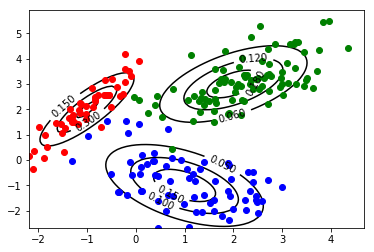

In [3]:
random.seed(0)
np.random.seed(0)

trueChage = np.concatenate( ( np.ones(10) , np.zeros(30), np.ones(70)*2.0 , np.ones(40) , np.zeros(60) ) , axis = 0)
trueMean = [ [2,3], [-1,2], [1,-1] ]
trueCov = [ [[0.9,0.5],[0.5,0.9]] , [[0.4,0.6],[0.5,0.9]], [[1.0,-0.5],[-0.5,1.0]] ]

for i in range(3):
    min_eig = np.min(np.real(np.linalg.eigvals(trueCov[i])))
    if min_eig < 0:
        trueCov[i] -= 10*min_eig * np.eye(trueCov[i].shape)
    
data = []
for i in range(len(trueChage)):
    data.append(np.random.multivariate_normal(trueMean[int(trueChage[i])],trueCov[int(trueChage[i])],1)[0])

print  ("True Chage : ",trueChage)
#print  ("Data : ",data)

plotPoints(data,trueChage,trueMean,trueCov)

#####################################################
Iteration  1
#####################################################
Cluster Assignment :  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 3 2 2 2 2 2 2 2 0 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 0]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 50, 72, 99, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 209], [10, 11, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 150, 151, 152, 153, 154, 155, 156, 157, 158

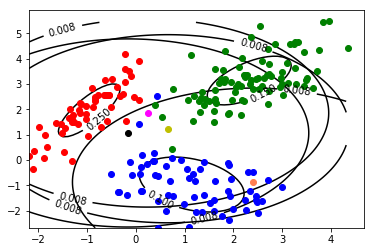

#####################################################
Iteration  2
#####################################################
Cluster Assignment :  [ 0  0  0  0  0  3  0  0  0  0  1  1  2  1  0  1  1  1  0  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  7  2  2  2  2  2
  2  2  4  2  2  2  1  8  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  0  2  2  2  2  2  2  2  2  2  2  9  2  2  2  2  2  2  2  5  2  2  2  2
  2  2  2  0  2  2  2  2  2  2  2  2  2 10  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  6  1  1  1  1  1  1  1  1  0  1  0]
Cluster Set :  [[0, 1, 2, 3, 4, 6, 7, 8, 9, 14, 18, 72, 99, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 14

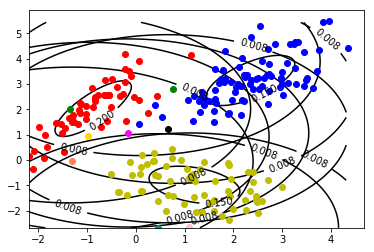

#####################################################
Iteration  3
#####################################################
Cluster Assignment :  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 1 2 2 2 2 2 2 2 3 2 2 2 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 0 1 0]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 18, 54, 72, 99, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 163, 207, 209], [10, 11, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 150, 151, 152, 153, 154, 

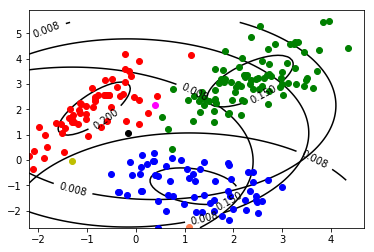

#####################################################
Iteration  4
#####################################################
Cluster Assignment :  [0 0 0 0 0 0 0 0 0 0 1 1 2 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 2 2 1 2 2 2 2 2 2 2 0 2 2 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 5 1 1 1 1 1 1 1 6 1 0]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 18, 50, 55, 72, 99, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 163, 198, 209], [10, 11, 13, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 42, 150, 151, 152, 153, 154, 155,

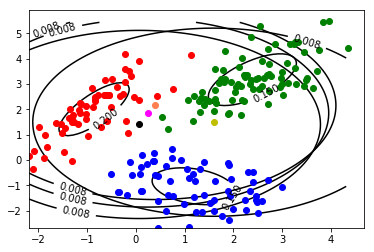

#####################################################
Iteration  5
#####################################################
Cluster Assignment :  [0 0 0 0 0 0 0 0 0 0 1 1 4 1 0 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 1 2 2 2 2 2 2 2 0 2 2 2 6 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 0]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 50, 55, 72, 99, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 209], [10, 11, 13, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 150, 151, 152, 153, 154, 155, 156, 157,

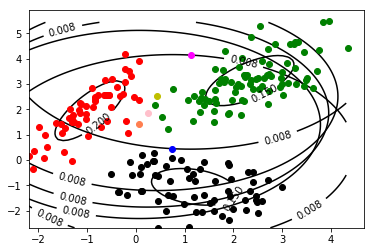

#####################################################
Iteration  6
#####################################################
Cluster Assignment :  [ 0  0  0  0  0  0  0  0  0  0  1  1  7  1  3  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  1  2  2  2  2  2
  2  2  6  2  2  2  8  9  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  0  2  2  2  2  2  2  2  2  2  2  2  2 10  2  2  2  2  2  2  2  2  2  2
  2  2  2 11  2  2  2  2  2  2  2  2  2  0  0  0  0  0  0  5  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  4  1  1  1  1  0]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 72, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 1

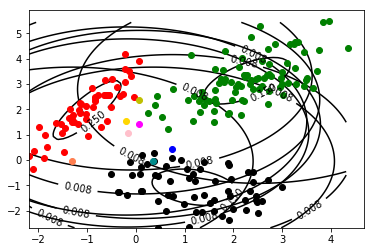

#####################################################
Iteration  7
#####################################################
Cluster Assignment :  [ 0  0  0  0  0  0  0  0  0  0  1  1  2  1  0  1  1  1  1  1  1  1  1  1
  1  1  6  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  1  2  2  2  2  2
  2  2  0  2  7  2  1  3  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  0  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  8  2  2  2  2  2  9  2  2  2 10  0  0  0  0  5  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  4  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 50, 72, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142

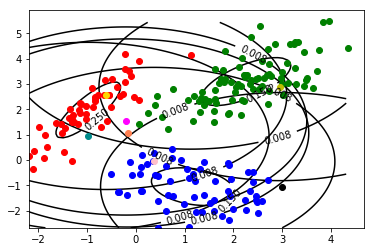

#####################################################
Iteration  8
#####################################################
Cluster Assignment :  [0 0 0 0 0 0 0 0 0 0 1 1 2 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 1 2 2 2 2 2 2 2 3 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 72, 99, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 209], [10, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 54, 55, 150, 151, 152, 153, 154, 155, 156, 157,

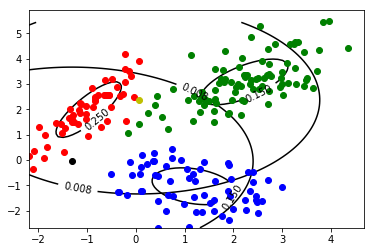

#####################################################
Iteration  9
#####################################################
Cluster Assignment :  [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  0  1  1  1  3  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  1  2  2  2  2  2
  2  2  4  2  2  2  5  6  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  0  2  2  2  7  2  2  2  2  2  2  2  2  2  2  2  2  2  2  8  2  2  2  2
  2  2  2  9  2 10  2  2  2 11  2  2  2  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 13  1  1  1  1  1  1  1  1  1  1  0]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 72, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 14

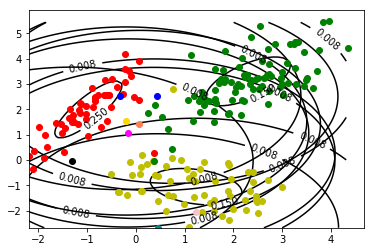

#####################################################
Iteration  10
#####################################################
Cluster Assignment :  [0 0 0 0 0 0 0 0 3 0 1 1 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 1 2 2 2 2 2 2 2 0 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 9, 14, 50, 72, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 209], [10, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 54, 55, 99, 150, 151, 152, 153, 154, 155, 156

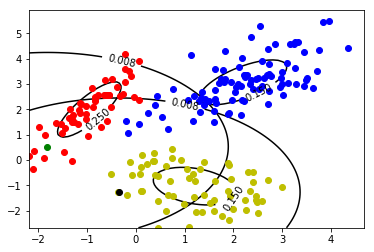

In [4]:
dpmm1 = DPMM()
dpmm1.cluster(data,0.0000001,itr=10,visualize=True,truncate=100)

#####################################################
Iteration  1
#####################################################
Cluster Assignment :  [ 0  1  2  0  0  0  0  0  0  0  3  4  4  4  5  4  6  7  8  9 10 11 12 13
 14  4  4  4 15 16  4 17  4 18  4  4  4  4  4  4  1 19 20  1  1 21  1  1
  1 22 23  1  1 24 25 26  1  1  1  1 27  1 28  1  1  1  1  1  1  1  1  1
  0  1  1  1 29 30 31 32 33 34  1 35  1  1  1  1 36  1 37 38 39  1 40 41
 42  1  1 43  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0 44  0
  0  0  0 45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 46
  0  0 47  0  0  0 48 49  4 50  4  4  4  4  4  4  4  4  4 51  4  4  4 52
  4  3  4  4  4  4  4 53  4  4  4 54  4  4  4  4  4  4  4  4  4  4  4 55
 56  4  4  4  4  4 57  4  4  4  4  4  4  4  4 58  4  0]
Cluster Set :  [[0, 3, 4, 5, 6, 7, 8, 9, 72, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 14

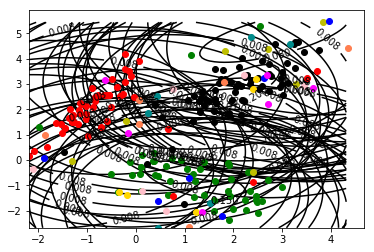

#####################################################
Iteration  2
#####################################################
Cluster Assignment :  [ 0  0 10  0  0  9  0  0  0  8  5  4  1  4  6  4  7  4  4  4  4 12  4 14
  4  4  4  4  4  4  4 18  4  4  4  4 19  4  4  4  1  1 22 21  1  1  1  1
  1  1 24  1  1  1  4 27  1  1  1  1  1  1  1  1  1 29  1  1  1  1  1  1
  0  1  1  1  1  1  1  1 20  1  1 25  1  1  1  1  1  1 11 23  1  1 26  1
  1  1  1  0  1  1  1  1  1  1  1  1  1 13  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 28 30  0  0  0 31  0  0  0  0  0  0  0
  0  0  0  0  0  0  3  4  4  4  4  4  4  4  4  4  4  4  4  0  3  4  4  4
  4 15 17  4  4  4  4  4  4  4 16  4  4  4  4  4  4  4  4  4  4  4  4  4
  2  4  4  4  4  4 32  4  4  4  4  4  4  4  4  4  4  0]
Cluster Set :  [[0, 1, 3, 4, 6, 7, 8, 72, 99, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 1

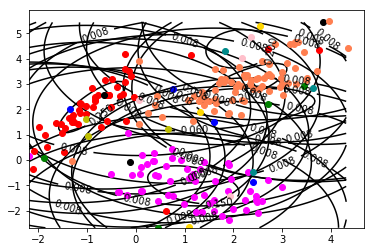

#####################################################
Iteration  3
#####################################################
Cluster Assignment :  [ 0  0  0  0  0  8  0  0  0  0  4  4  1  4  0  4  4  4  4  4  4  9  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  1  1  4  1  1  1  1  1
  1  1 12  1  1  1  4  6  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  0  1  1  5  1  1  1  1  1  1  1 11  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  0  1  1 10  1  1  1  1  1  1  0  7  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  3  4  4  4  4  4  4  4  4  4  4  4  4  0  4  4  2  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4 13  4  4  4  4  4  4  4  4  4  0]
Cluster Set :  [[0, 1, 2, 3, 4, 6, 7, 8, 9, 14, 72, 99, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 1

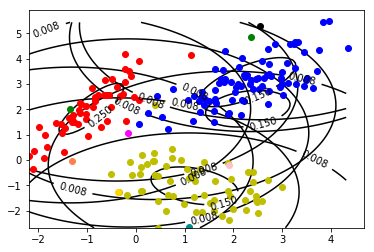

#####################################################
Iteration  4
#####################################################
Cluster Assignment :  [0 0 0 0 0 0 0 0 0 0 4 4 1 4 0 4 4 4 0 4 4 3 4 3 4 4 4 4 4 4 4 4 4 3 4 4 2
 4 4 4 1 1 4 1 1 1 1 1 1 1 0 1 1 1 6 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 8 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 9 4 4 4 0]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 18, 50, 72, 99, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 163, 209], [12, 40, 41, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80

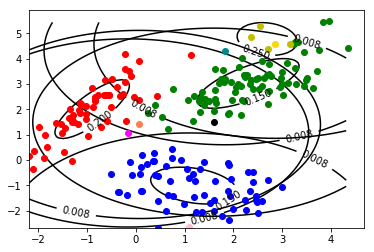

#####################################################
Iteration  5
#####################################################
Cluster Assignment :  [ 0  0  0  0  0  0  0  0  0  0  4  4  5  4  0  4  4  4  6  4  4  3  4  3
  4  2  4  4  4  4  4  4  4  4  4  4  4  4  4  4  1  1  4  1  1  1  1  1
  1  1  0  1  1  1  4  4  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  0  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  9  4  4  2  4  4  4  4  4  4  4  4  4 10  4  4  4  8
  4  2  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  7  4  4  4  4  4  4  4  4  2  4  4 11  4  4  4  0]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 50, 72, 99, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,

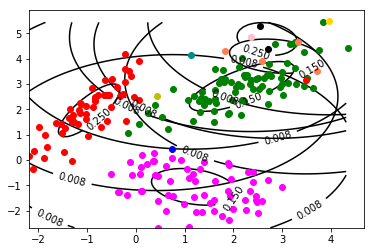

#####################################################
Iteration  6
#####################################################
Cluster Assignment :  [ 0  0  0  0  0  0  0  0  0  0  5  4 12  4  6  4  4  4  4  4  4  3  4  2
  2  4  4  4  4  4  4  4  4  4  4  4  4  4  2  4  1  1  4  1  1  1  1  1
  1  1 13  1  1  1 14 15  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  0  1  1  1  1  1  1  1  1  1  1  1  1 10  1  1  1  1  1  1  1  1  1  1
  1  1  1  4  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  9  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  2  4  4  4  4  4  4  4  4  4  4  4  4  8  2  4  4 16
  2  2  4  4  4  4  4  4  4  4  2  7  4  4  4  4  4  4  4  4  4  4  2  2
  4  4  4  4  4  4  4  4  4  4  2  4 11  2  4  4  4 17]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 72, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 1

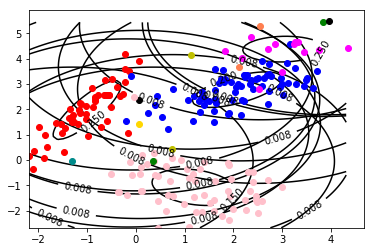

#####################################################
Iteration  7
#####################################################
Cluster Assignment :  [ 0  0  0  0  0  0  0  0  0  0  2  4  1  4  4  4  3  4  4  4  4  2  4  2
  2 15 16  4  4  2  4  4  4  2  2  4  6  4 13  2  1  1  4  1  1  1  1  1
  1  1  1  1 14  1  4 10  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 17  1  1  1  1  1 18  1  1  1 19  0  0  0  0  9  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  2  4  4  4  4  2  4  4  4  4  4  4  8  7 12  4  4  2
  2  2  4  4  4  4  4  4  4  4  2  5  4  4  4  4  4  4  4  4  4  2  2 11
  4  4  4  4  4  2  4  4  4  4  2  4  4  2  4  4  2  0]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 72, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 1

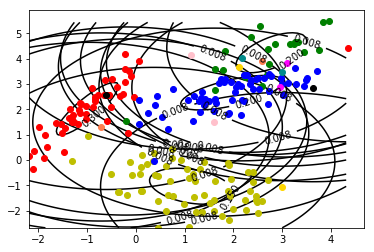

#####################################################
Iteration  8
#####################################################
Cluster Assignment :  [ 0  0  0  0  0  0  0  0  0  0  2  4  1  4  3  4  4  9  4  4  4  2  4  2
  2  2  4 13  4  4  4  4  6  2  2  4  4  4  4  2  1  1  4  1  1  1  1  1
  1  1 14  1  1  1  4  1  1  1  1  1 10  1  1  1  1  1  1  1  1  1  1  1
  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  4  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  2  4  4  4  4  8  4  2  4  4  4  4  7 12  2  4  4  2
  2  2  4  4  4 15  4  4  4  4  5 16  4  4  2  4  4  4  4 17  4 11  2 18
 19  4  4  4  4  4  4  4  4  4  2  4  4  2  4 20  4  0]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 72, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 1

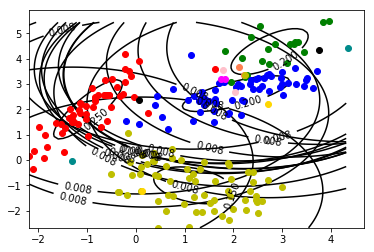

#####################################################
Iteration  9
#####################################################
Cluster Assignment :  [ 0  0  0  0  0  0  0  0  0  0  2  3  1  4  9  4  4  2 13  4  2  2  4  2
  2  2  4 21  2  6  4  4  4  2  2  4  4  4  4  4  1  1  1  1  1  1  1 14
  1  1 22  1  1  1 23 10  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  0  1  1  1 18  1  1  1  1  1  1  1  1  1  1  1  1  1  1 11  1  1  1  1
  1  1  1 17  1 16  1  1  1 12  1  1  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0
  0  0  0  0  0  0  2  4  4  4  4  2  2  4  4  4  4  4  2  2  2  4 15  2
  2  2  4  4  4  4  4  5  4  4  2  2  4  4  4  4  4  4  4  4  4  2  2 19
  4  4 24  4  4  4 20  4  4  4  2  4  4  2  2  4  4  0]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 72, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 1

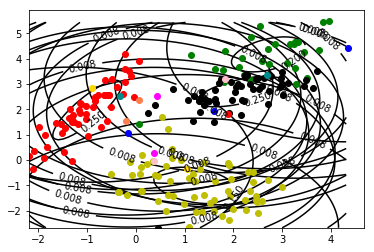

#####################################################
Iteration  10
#####################################################
Cluster Assignment :  [ 0  0  0  0  0  0  0  0  3  0  2  4  1  4  0  4 13  2  4  4  2  2  4  2
  2  2  4  6  2  4  4  2  4  2  2  4  4  4  2  4  1  1  4  1  1  1  1  1
  1  1  0  1  1  1  4 11  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12  1  1  1
  1  1  1  4  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  8  0  0  0  0
  0  0  0  0  0  0  2  4  4 16  4 17 18  2  4  4  7  4  2  2  2  4  4  2
  2  2  4  2  2  5  4  2  4 19  2  2  4  4  4  4  9  2  4 10  2  2  2  2
  4  2  4 20 14  2 21  4  2 22  2  4 23  2 24  4  4  0]
Cluster Set :  [[0, 1, 2, 3, 4, 5, 6, 7, 9, 14, 50, 72, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 140, 141, 142, 

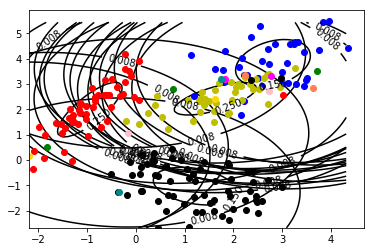

In [5]:
random.seed(0)
np.random.seed(0)

dpmm2 = DPMM()
dpmm2.cluster(data,0.01,itr=10,visualize=True,truncate=100)

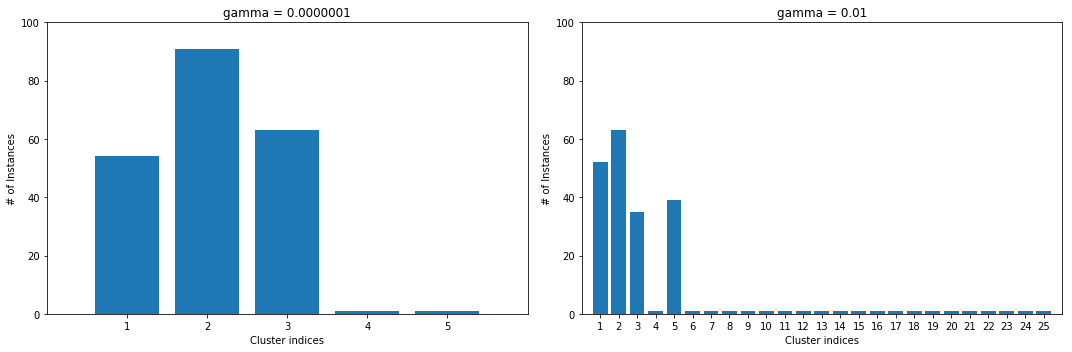

In [6]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)

sub1 = fig.add_subplot(1, 2, 1)
x1 = np.arange(1,dpmm1.cntClusters+1)
sub1.bar(x1, dpmm1.cntClusterAssignment, tick_label=x1)
plt.xlabel('Cluster indices')
plt.ylabel('# of Instances')
plt.title('gamma = 0.0000001')
plt.xlim(0, dpmm1.cntClusters+1)
plt.ylim(0, 100)

sub2 = fig.add_subplot(1, 2, 2)
x2 = np.arange(1,dpmm2.cntClusters+1)
sub2.bar(x2, dpmm2.cntClusterAssignment, tick_label=x2)
plt.xlabel('Cluster indices')
plt.ylabel('# of Instances')
plt.title('gamma = 0.01')
plt.xlim(0, dpmm2.cntClusters+1)
plt.ylim(0, 100)

fig.tight_layout()

plt.show()

# 결과해석부

위의 dpmm1에서는 DPMM을 $\gamma$를 0.0000001로 놓고 iteration이 진행되는 과정을, 아래의 dpmm2에서는 DPMM을 $\gamma$를 0.01로 놓고 iteration을 진행되는 과정을 볼 수 있습니다. Iteration이 진행될 수록 cluster 갯수가 늘어나며 clustering이 정교해지는 것을 볼 수 있습니다. 또한 assignment 가 처음에 잘 된 cluster 일수록 더 많은 assignment를 가져가는 일명 '빈익빈 부익부'현상이 관찰됩니다. 특히, $\gamma$가 0.01이 되었을 때 2개의 main cluster가 서로 중첩된 상황에서 형성됨을 알 수 있다. cluster를 약간 벗어난 점의 분포가 2개의 분포가 중첩되었다고 인식한 것이다.

하단의 그래프에서는 $\gamma$값에 따른 cluster별 instance의 개수를 비교하여 나타냈습니다. $\gamma$의 값이 0.0000001일 때는 3개의 main cluster가 큰 범위로 자리잡아 있고 그 사이에 매우 작은 cluster들이 자리잡고 있습니다. 반면, $\gamma$의 값이 0.01이 되면서 main cluster가 4개로 증가하였습니다. $\gamma$가 커질수록 새로운 cluster가 생성될 확률이 커짐을 알 수 있습니다. cluster 개수를 의미했던 $k$의 역할을 $\gamma$가 수행하고 있으며 정해진 값이 아닌 sensitivity 변수에 의해 추상적인 값으로 설정되어 모델을 nonparametric하게 변화시키고 있습니다.